Otsu's threshold value: 87
I count 2 coins in this image.


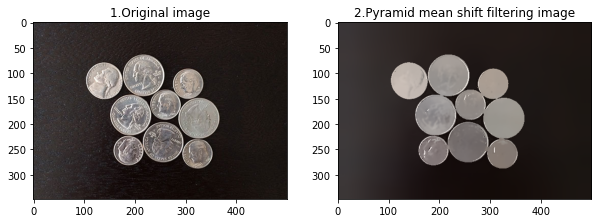

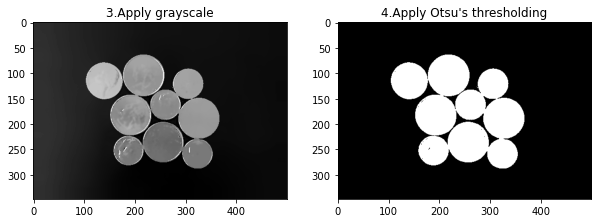

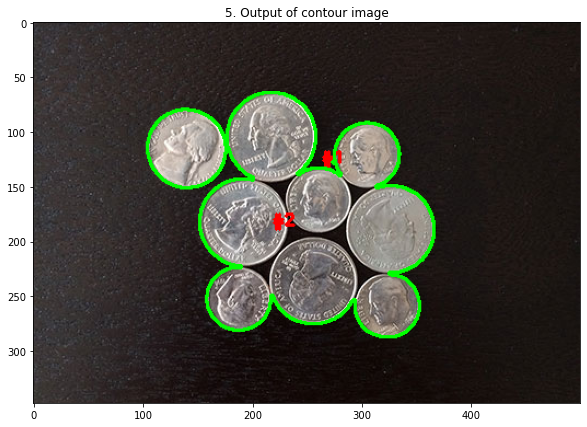

In [28]:
import cv2
import mahotas
from matplotlib import pyplot as plt

#Open source image
path = r'../images/watershed.jpg'
original = cv2.imread(path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
shifted = cv2.pyrMeanShiftFiltering(original, 20, 55)

fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(1,2,1)
ax1.set_title('1.Original image')
ax1.imshow(original)
ax2 = fig1.add_subplot(1,2,2)
ax2.set_title('2.Pyramid mean shift filtering image')
ax2.imshow(shifted)

#Apply Otsu Thresholding
bw = cv2.cvtColor(shifted, cv2.COLOR_RGB2GRAY)
fig2 = plt.figure(figsize=(10, 7))
ax1 = fig2.add_subplot(1,2,1)
ax1.set_title('3.Apply grayscale')
ax1.imshow(bw, cmap='gray')

T = mahotas.thresholding.otsu(bw)
print("Otsu's threshold value: {}".format(T))
bw[bw > T] = 255
bw[bw < 255] = 0

ax2 = fig2.add_subplot(1,2,2)
ax2.set_title("4.Apply Otsu's thresholding")
ax2.imshow(bw, cmap='gray')

# find contours in the thresholded image
(cnts, _) = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I count {} coins in this image.".format(len(cnts)))

# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(original, '#{}'.format(i+1), (int(x)-10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    cv2.drawContours(original, [c], -1, (0, 255, 0), 2)

fig3 = plt.figure(figsize=(10, 7))
ax1 = fig3.add_subplot(1,1,1)
ax1.set_title('5. Output of contour image')
ax1.imshow(original)